In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import pickle

(500,)


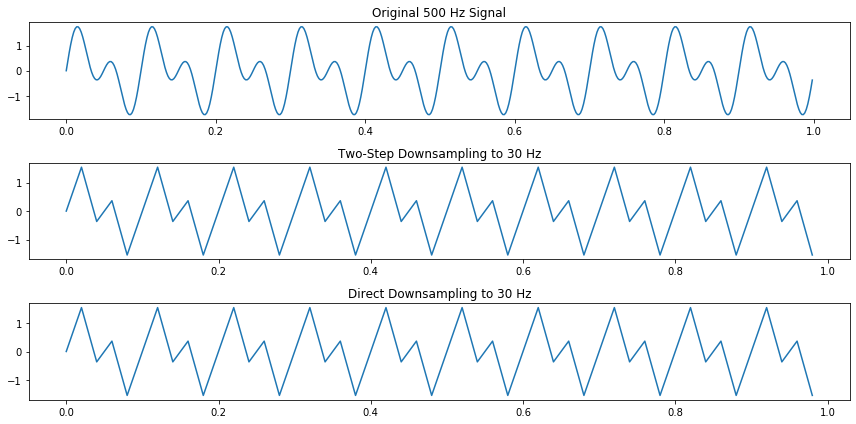

In [7]:
import numpy as np
from scipy.signal import resample
import matplotlib.pyplot as plt

# Parameters
sampling_rate_original = 500  # Original sampling rate in Hz
duration = 1.0                # Duration of the signal in seconds
frequency = 10.0              # Frequency of the signal in Hz
frequency2 = 20.0
# Generate a 500 Hz sinusoidal signal
t_original = np.linspace(0, duration, int(sampling_rate_original * duration), endpoint=False)
signal_original = np.sin(2 * np.pi * frequency * t_original) + np.sin(2 * np.pi * frequency2 * t_original)
print(signal_original.shape)

# Step 1: Downsampling from 500 Hz to 150 Hz
sampling_rate_step1 = 150
signal_step1 = resample(signal_original, int(duration * sampling_rate_step1))

# Step 2: Downsampling from 150 Hz to 30 Hz
sampling_rate_step2 = 10
signal_step2 = resample(signal_step1, int(duration * sampling_rate_step2))

# Direct Downsampling from 500 Hz to 30 Hz
sampling_rate_direct = 10
signal_direct = resample(signal_original, int(duration * sampling_rate_direct))

# Plot the signals
plt.figure(figsize=(12, 6))

plt.subplot(311)
plt.plot(t_original, signal_original)
plt.title("Original 500 Hz Signal")

plt.subplot(312)
plt.plot(np.linspace(0, duration, len(signal_step2), endpoint=False), signal_step2)
plt.title("Two-Step Downsampling to 30 Hz")

plt.subplot(313)
plt.plot(np.linspace(0, duration, len(signal_direct), endpoint=False), signal_direct)
plt.title("Direct Downsampling to 30 Hz")

plt.tight_layout()
plt.show()

In [3]:
recall_dat = pd.read_pickle("/scratch/efeghhi/catFR1/IRIonly/SWR_catFR1_R1674A_0_HPC_surrounding_recall_soz_in_hamming.p")
encoding_dat = pd.read_pickle("/scratch/efeghhi/catFR1/ENCODING/SWR_catFR1_R1674A_0_HPC_encoding_soz_in_hamming.p")

In [16]:
recall_dat.keys()

dict_keys(['region_electrode_ct', 'elec_names', 'sub_sess_names', 'ripple_array', 'HFA_pow', 'theta_pow', 'theta_phase_array', 'time_add_save', 'trial_nums', 'encoded_word_key_array', 'category_array', 'serialpos_array', 'list_recall_num_array', 'rectime_array', 'session_events', 'recall_position_array', 'fr_array', 'sub_names', 'total_recalls', 'kept_recalls', 'trial_by_trial_correlation', 'elec_by_elec_correlation', 'elec_ripple_rate_array', 'semantic_clustering_key', 'temporal_clustering_key', 'semantic_clustering_from_key', 'serialpos_lags', 'serialpos_from_lags', 'CRP_lags', 'list_trial_nums', 'list_num_key', 'list_level_semantic', 'list_level_temporal', 'electrode_labels', 'channel_coords'])

In [52]:
len(encoding_dat['elec_names'])

9

In [57]:
num_trials = encoding_dat['HFA_pow'].shape[0]
recalled_pos_array = np.reshape(encoding_dat['recall_position_array'], (-1, num_trials)).T
recalled_pos_array = recalled_pos_array[:, 0]

In [47]:
num_recalled = 0 
    
for i in range(0, recalled_pos_array, 12):
    
    recalled_idxs = encoding_dat['recall_position_array'][i]
    print(recalled_idxs)
    for r in recalled_idxs:
        if r > 0 and r <= 13:
            num_recalled += 1
            
print(num_recalled)
            
    

[1, 4, 1, 4, 10, 11]
[1, 11, 1, 11]
[8, 3, 9, 1]
[3, 4, 1, 7, -999]
[1, -999]
[2, 1, 7, 9, 10, 5]
[1, -999, 3, -999, 4, 7, 8]
[1, 3, 4, 12]
[-999, -999, 10, 9]
[3, 4, 1, 2, 12, 5]
[1, 6, 5, -999]
[-999, -999, 4, 2, -999]
[1, 4, 1, 4, 10, 11]
[1, 11, 1, 11]
[8, 3, 9, 1]
[3, 4, 1, 7, -999]
[1, -999]
[2, 1, 7, 9, 10, 5]
[1, -999, 3, -999, 4, 7, 8]
[1, 3, 4, 12]
[-999, -999, 10, 9]
[3, 4, 1, 2, 12, 5]
[1, 6, 5, -999]
[-999, -999, 4, 2, -999]
[1, 4, 1, 4, 10, 11]
[1, 11, 1, 11]
[8, 3, 9, 1]
[3, 4, 1, 7, -999]
[1, -999]
[2, 1, 7, 9, 10, 5]
[1, -999, 3, -999, 4, 7, 8]
[1, 3, 4, 12]
[-999, -999, 10, 9]
[3, 4, 1, 2, 12, 5]
[1, 6, 5, -999]
[-999, -999, 4, 2, -999]
[1, 4, 1, 4, 10, 11]
[1, 11, 1, 11]
[8, 3, 9, 1]
[3, 4, 1, 7, -999]
[1, -999]
[2, 1, 7, 9, 10, 5]
[1, -999, 3, -999, 4, 7, 8]
[1, 3, 4, 12]
[-999, -999, 10, 9]
[3, 4, 1, 2, 12, 5]
[1, 6, 5, -999]
[-999, -999, 4, 2, -999]
[1, 4, 1, 4, 10, 11]
[1, 11, 1, 11]
[8, 3, 9, 1]
[3, 4, 1, 7, -999]
[1, -999]
[2, 1, 7, 9, 10, 5]
[1, -999, 3, -999,

In [40]:

print(len(encoding_dat['recall_position_array'])/12)

108.0


In [42]:
encoding_dat['list_num_key']

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,


In [9]:
encoding_dat.keys()

dict_keys(['region_electrode_ct', 'elec_names', 'sub_sess_names', 'ripple_array', 'HFA_pow', 'theta_pow', 'theta_phase_array', 'time_add_save', 'trial_nums', 'encoded_word_key_array', 'category_array', 'serialpos_array', 'list_recall_num_array', 'rectime_array', 'session_events', 'recall_position_array', 'fr_array', 'sub_names', 'total_recalls', 'kept_recalls', 'trial_by_trial_correlation', 'elec_by_elec_correlation', 'elec_ripple_rate_array', 'semantic_clustering_key', 'temporal_clustering_key', 'semantic_clustering_from_key', 'serialpos_lags', 'serialpos_from_lags', 'CRP_lags', 'list_trial_nums', 'list_num_key', 'list_level_semantic', 'list_level_temporal', 'electrode_labels', 'channel_coords'])

In [12]:
encoding_dat['list_num_key']

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,


In [10]:
from clustering import *

In [ ]:
catFR_dir = '/scratch/efeghhi/catFR1/ENCODING'
region_name = 'HPC'
load_data_pooled(catFR_dir, region_name)